Luis Adolfo Martínez Ortiz
Carné:
**22000352** 

**Practica 3 Reduccion de dimensionalidades**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import os
from tensorflow import keras
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [ ]:
import os.path
from os import path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
direccion = "/content/drive/MyDrive/TextMining/Archivos"
os.chdir(direccion)

In [8]:
dataset = keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = dataset.load_data()

### Función para reducción

In [105]:
class Reduccion:
  def __init__(self,df,n):
    self.dlf = df
    self.nl   = n
  def normal(self,df,media,dev,x):
    norm = (df-media)/dev
    return norm  
  def lineig(self,sigma):
    eigen, eigen_vec = np.linalg.eigh(sigma)
    return eigen, eigen_vec
  # reducción de dimension con PCA  
  def grafica(self,data,label,x):
    # Grafica de resultado
    plt.plot(data['P1'], data['P2'],'x')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(str(label))
    plt.show()
  def PCA_valida_dimension(self):
    df2 = self.dlf.reshape(-1,self.dlf.shape[1] * self.dlf.shape[2]).astype(float)
    media = df2.mean(axis=0).reshape(1, df2.shape[1])
    desv = df2.std(axis=0).reshape(1, df2.shape[1])
    norm = self.normal(df2,media,desv,2)
    # Calcular la matriz de covarianza
    sigma = np.cov(norm, rowvar = False)
    eigen, eigen_vec = self.lineig(sigma)
    sorted_index = np.argsort(eigen)[::-1]
    sorted_eigenvalue = eigen[sorted_index]
    sorted_eigen = eigen_vec[:,sorted_index]

    reduccion = sorted_eigen[:,0:self.nl] 

    
    info_reducida = np.matmul(reduccion.T, norm.T).T
    df_reduced_new = pd.DataFrame(info_reducida, columns = ['P1','P2'])

    return df_reduced_new



In [106]:
#instanciamos nuestra clase
dim_redu = Reduccion(test_img,2)

In [107]:
test_PCA = dim_redu.PCA_valida_dimension()

In [108]:
test_PCA

,P1,P2
0,-16.812930,-7.211594
1,22.272440,-9.561994
2,3.924990,16.794870
3,-4.979114,16.840440
4,2.306663,0.354408
...,...,...
9995,-5.932138,-16.013988
9996,-11.599824,14.494563
9997,-6.940768,8.629264
9998,-2.835375,15.493498


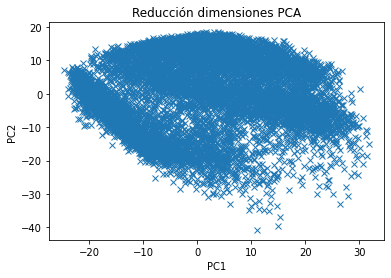

In [110]:
#resultado
dim_redu.grafica(test_PCA,'Reducción dimensiones PCA',2)

**T-SNE SKLEARN**

In [84]:
imagen_2d = test_img.reshape(-1, test_img.shape[1] * test_img.shape[2]).astype(np.float32)


In [85]:
test_TSNE = TSNE(n_components=2, perplexity=50).fit_transform(imagen_2d)
test_TSNE = pd.DataFrame(test_TSNE, columns = ['P1','P2'])
test_TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,P1,P2
0,3.906310,-50.715309
1,38.592472,42.088524
2,-65.201279,8.202589
3,-60.163181,-1.654316
4,30.290125,12.508295
...,...,...
9995,21.703245,-49.008675
9996,-52.824715,-2.651570
9997,20.912756,-12.791304
9998,-59.085552,-11.240946


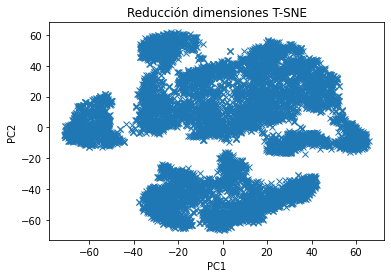

In [112]:
#Resultado
dim_redu.grafica(test_TSNE,'Reducción dimensiones T-SNE',2)

# Agrupación por color  con cluster por GMM

In [123]:
def grafica_GMM(gmm, df,label):
  clusters = gmm.predict(df)
  plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters)
  plt.scatter(gmm.means_[:,0], gmm.means_[:,1], s=100, c="blue", label="Centroide")
  plt.xlabel("P1")
  plt.ylabel("P2")
  plt.title("Cluster GMM")
  plt.legend()
  plt.show()

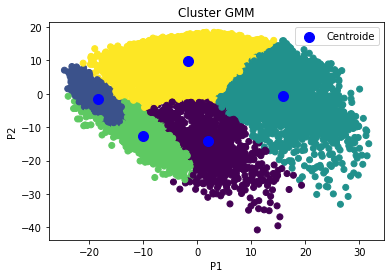

In [124]:
gmm_PCA = GaussianMixture(n_components=5, random_state=0).fit(test_PCA)
grafica_GMM(gmm_PCA, test_PCA,'PCA')

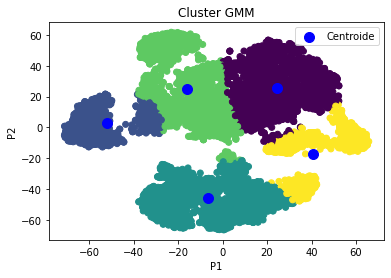

In [125]:
gmm_TSNE = GaussianMixture(n_components=5, random_state=0).fit(test_TSNE)
grafica_GMM(gmm_TSNE, test_TSNE,'TSNE')

Conclusiones

Al observar las gráficas de PCA y T-SNE la de PCA fluctuan en ambas componenetes. 

Con el T-SNE se puede observar o iterpretar de mejor manera la segmentación.

.
